In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dict_list = {'Feature 1': np.random.randint(0,100,size=(100,)), 'Feature 2': np.random.randint(0,100,size=(100))}
df = pd.DataFrame(dict_list)
df.head()

,Feature 1,Feature 2
0,36,50
1,90,93
2,24,79
3,75,59
4,15,71


In [14]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [16]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'iris_dataset.csv', 'KMeansClustering.ipynb', 'OutlierFinding&Standarization.ipynb', 'Practice-1.ipynb', 'Practice-2.ipynb', 'Practice-3.ipynb', 'Practice-4.ipynb', 'PreprocessingPart1.ipynb', 'TextPrepsocessingPart-1.ipynb', 'titanic_dataset.csv']


In [17]:
# sklearn.metrics.__dir__()
data = pd.read_csv("iris_dataset.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data[data.columns[-1]] = lc.fit_transform(data[data.columns[-1]])
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
data_x = data.drop(columns=['target'])
data_y = data.target
print(data_x.shape, data_y.shape)

(150, 4) (150,)


In [48]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=4)
pca = PCA(0.99)
print(data_x.shape)
data_x_pca = pca.fit_transform(data_x)
print(data_x_pca.shape)

(150, 4)
(150, 3)


In [50]:
pd.DataFrame(data_x_pca)

,0,1,2
0,-2.684207,0.326607,-0.021512
1,-2.715391,-0.169557,-0.203521
2,-2.889820,-0.137346,0.024709
3,-2.746437,-0.311124,0.037672
4,-2.728593,0.333925,0.096230
...,...,...,...
145,1.944017,0.187415,0.179303
146,1.525664,-0.375021,-0.120636
147,1.764046,0.078519,0.130784
148,1.901629,0.115877,0.722874


# 11

In [61]:
X = data.drop(columns='target')
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
cov = (X.T @ X) / (X.shape[0] - 1)

In [63]:
eig_values, eig_vectors = np.linalg.eig(cov)

In [64]:
idx = np.argsort(eig_values, axis=0)[::-1]

In [65]:
sorted_eig_vectors = eig_vectors[:,idx]

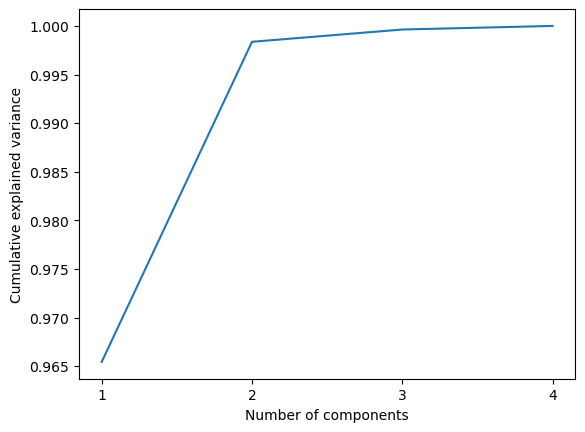

In [69]:
cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])

xint = range(1, len(cumsum)+1)

import matplotlib.pyplot as plt
plt.plot(xint, cumsum)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.xticks(xint)
# plt.xlim(1,4,1)
plt.show()

In [60]:
X_pca = np.dot(X, sorted_eig_vectors[:,:2])
print(X_pca.shape)

(150, 2)


In [ ]:
def PCA_function(X):
    cov = (X.T@X)/(X.shape[0]-1)
    eig_val, eig_vec = np.linalg.eig(cov)
    idx = np.argsort(eig_values, axis=0)[::-1]
    sorted_eig_vectors = eig_vectors[:,idx]
    X_pca = np.dot(X, sorted_eig_vectors[:,:2])